<a href="https://colab.research.google.com/github/Naresh0298/Machine-Learning-Projects/blob/main/PCA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')



In [7]:
df_adult = pd.read_csv('/content/adult.csv')
display(df_adult.head())

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
df_adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [9]:
df_adult.shape

(32561, 15)

In [10]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [11]:
df_adult[df_adult == "?"] = np.nan

In [12]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [17]:
df_adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [14]:
for col in ['workclass', 'occupation', 'native.country']:
  df_adult[col].fillna(df_adult[col].mode()[0], inplace=True)

In [18]:
df_adult.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,0
relationship,0
race,0
sex,0


In [19]:
X = df_adult.drop(['income'], axis=1)
y = df_adult['income']

In [21]:
X.shape

(32561, 14)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 0)


###Feature Engineering

In [27]:
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']

le = preprocessing.LabelEncoder()

for feature in categorical:
  X_train[feature] = le.fit_transform(X_train[feature])

  X_test[feature] = le.fit_transform(X_test[feature])

### Feature Scaling

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [30]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.101484,2.600478,-1.494279,-0.332263,1.133894,-0.402341,-0.782234,2.214196,0.39298,-1.430470,-0.145189,-0.217407,-1.662414,0.262317
1,0.028248,-1.884720,0.438778,0.184396,-0.423425,-0.402341,-0.026696,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.200753,0.262317
2,0.247956,-0.090641,0.045292,1.217715,-0.034095,0.926666,-0.782234,-0.276689,0.39298,-1.430470,-0.145189,-0.217407,-0.038346,0.262317
3,-0.850587,-1.884720,0.793152,0.184396,-0.423425,0.926666,-0.530388,0.968753,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317
4,-0.044989,-2.781760,-0.853275,0.442726,1.523223,-0.402341,-0.782234,-0.899410,0.39298,0.699071,-0.145189,-0.217407,-0.038346,0.262317


### Logistic Regression model with all Features

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('LR accu score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

LR accu score with all the features: 0.8217


In [33]:
### PCA

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14757168, 0.10182915, 0.08147199, 0.07880174, 0.07463545,
       0.07274281, 0.07009602, 0.06750902, 0.0647268 , 0.06131155,
       0.06084207, 0.04839584, 0.04265038, 0.02741548])

#### TYPE 2

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix



In [36]:
plt.style.use('seaborn-v0_8-whitegrid')

In [37]:
data = load_breast_cancer()
X, y = data.data, data.target

In [38]:
X.shape

(569, 30)

In [42]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [45]:
pca = PCA()
pca.fit(X_train)

PCA()

In [46]:
cumvar = np.cumsum(pca.explained_variance_ratio_)
n_90 = np.argmax(cumvar >= 0.90) + 1
n_95 = np.argmax(cumvar >= 0.95) + 1

print(f"Components for 90% variance: {n_90}")
print(f"Components for 95% variance: {n_95}")

Components for 90% variance: 7
Components for 95% variance: 10


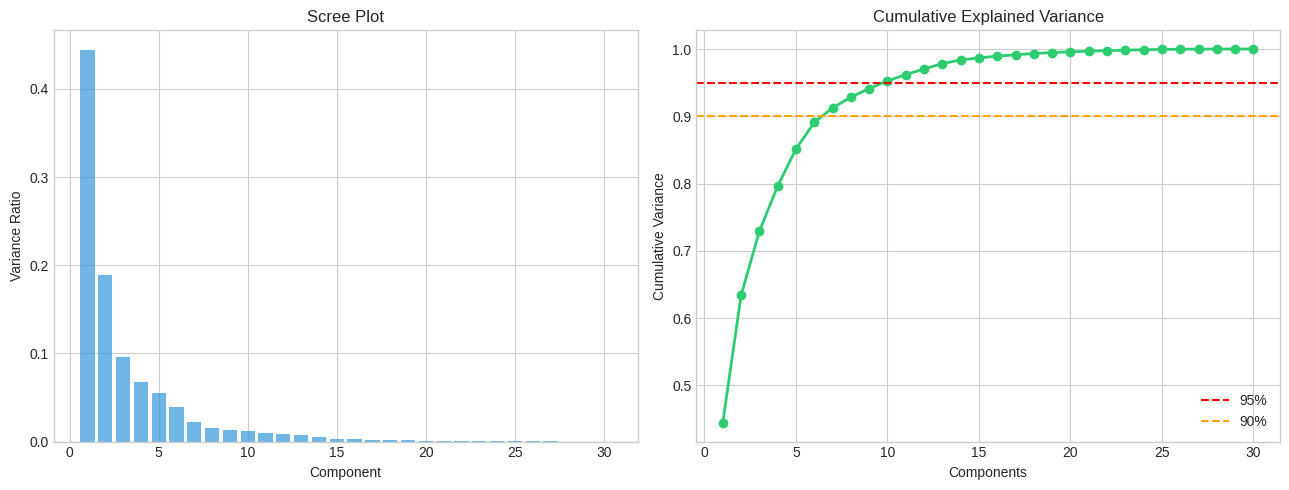

In [50]:
#Scree + Cumulative plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))
ax1.bar(range(1, 31), pca.explained_variance_ratio_, color='#3498db', alpha=0.7)
ax1.set_xlabel('Component')
ax1.set_ylabel('Variance Ratio')
ax1.set_title('Scree Plot')

ax2.plot(range(1, 31), cumvar, 'o-', color='#2ecc71', linewidth=2)
ax2.axhline(0.95, color='red', linestyle='--', label='95%')
ax2.axhline(0.90, color='orange', linestyle='--', label='90%')
ax2.set_xlabel('Components')
ax2.set_ylabel('Cumulative Variance')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
plt.tight_layout()
plt.savefig('scree_plot.png', dpi=150, bbox_inches='tight')
# plt.close()

In [52]:
pca= PCA(n_components=10)  # 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"\nReduced: {X_train.shape[1]}d → {X_train_pca.shape[1]}d "
      f"({sum(pca.explained_variance_ratio_)*100:.1f}% variance)")


Reduced: 30d → 10d (95.3% variance)


In [55]:
lr_base = LogisticRegression(max_iter=10000, random_state=42)
lr_base.fit(X_train, y_train)
acc_base = accuracy_score(y_test, lr_base.predict(X_test))

In [56]:
#PCA (10 features)
lr_pca = LogisticRegression(max_iter=10000, random_state=42)
lr_pca.fit(X_train_pca, y_train)
y_pred = lr_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred)

print(f"\nBaseline (30d): {acc_base:.4f}")
print(f"PCA     (10d): {acc_pca:.4f}")
print(f"\n{classification_report(y_test, y_pred, target_names=['malignant', 'benign'])}")



Baseline (30d): 0.9825
PCA     (10d): 0.9737

              precision    recall  f1-score   support

   malignant       0.95      0.98      0.96        42
      benign       0.99      0.97      0.98        72

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



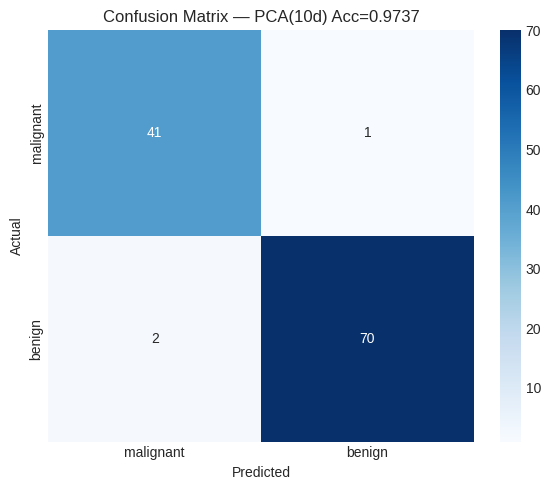

In [58]:
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['malignant', 'benign'],
            yticklabels=['malignant', 'benign'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title(f'Confusion Matrix — PCA(10d) Acc={acc_pca:.4f}')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')


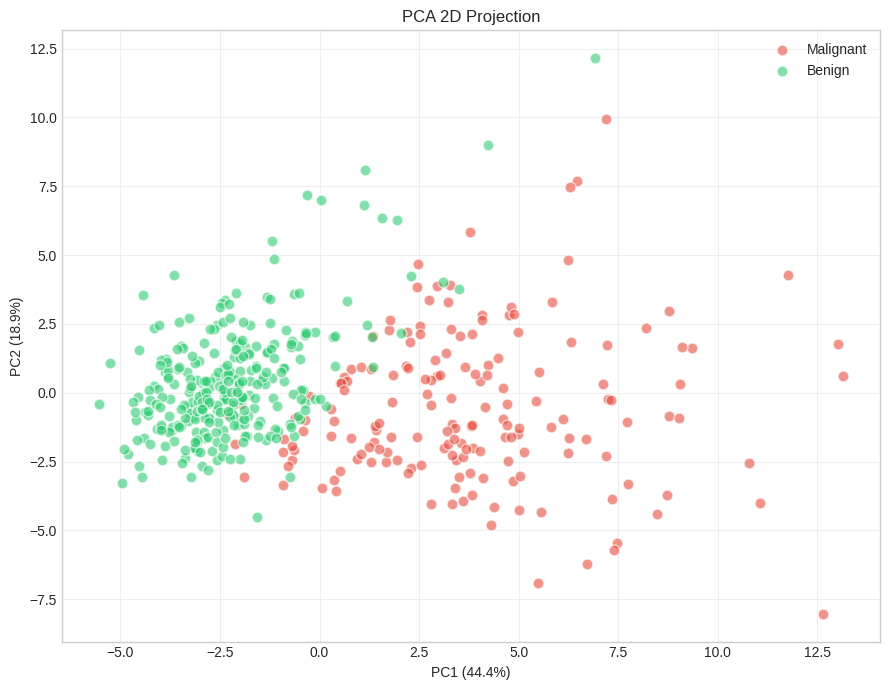

In [60]:
pca_2d = PCA(n_components=2)
X_2d = pca_2d.fit_transform(X_train)

fig, ax = plt.subplots(figsize=(9, 7))
for cls, label, color in [(0, 'Malignant', '#e74c3c'), (1, 'Benign', '#2ecc71')]:
    mask = y_train == cls
    ax.scatter(X_2d[mask, 0], X_2d[mask, 1], c=color, label=label,
              alpha=0.6, edgecolors='white', s=60)
ax.set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}%)')
ax.set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}%)')
ax.set_title('PCA 2D Projection')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('pca_2d.png', dpi=150, bbox_inches='tight')
